In [1]:
import os
os.getcwd()

'/home/onyxia/work/hackathon-un-2022/notebooks'

In [2]:
os.chdir("..")
import utils.functions as fc

In [3]:
from importlib import reload
fc = reload(fc)

In [4]:
ship_data_enriched = fc.create_ship_data_enriched()
AIS = fc.read_ais_parquet()
#AIS_enriched = fc.enrich_AIS_data(
#    AIS, ship_data_enriched
#)

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
AIS_enriched = fc.enrich_AIS_data(
    AIS, ship_data_enriched
)

In [6]:
AIS_enriched.drop_duplicates('mmsi').agg({"mmsi": "nunique"})

mmsi    1177
dtype: int64

In [7]:
int(
    fc.count_boats(AIS_enriched, unique_id = "mmsi")
)

1177

In [165]:
fc.count_boats(AIS_enriched, by = "ShiptypeLevel1")

ShiptypeLevel1
Cargo Carrying                 1331
Work Vessel                     510
Non Seagoing Merchant Ships       9
Non Merchant                      7
Non Propelled                     4
Non Ship Structure                1
dtype: int64

In [172]:
fc = reload(fc)
fc.count_boats(AIS_enriched, by = "ShiptypeLevel1")
fc.count_boats_blocked(AIS_enriched, var = "ShiptypeLevel1", share_not_usable=0.6)


,0
ShiptypeLevel1,
Cargo Carrying,532.4
Work Vessel,204.0
Ships blocked,1117.2


In [11]:
fc.count_boats(AIS_enriched, by = "ShipTypeLevel2")

ShipTypeLevel2
Dry Cargo/Passenger            719
Miscellaneous                  358
Tankers                        335
Bulk Carriers                  277
Fishing                        118
Offshore                        34
Non-Seagoing Merchant Ships      9
Non-Merchant Ships               7
Non-Propelled                    4
Non-Ship Structures              1
dtype: int64

In [12]:
fc.count_boats(AIS_enriched, by = "ShipTypeLevel3")

ShipTypeLevel3
General Cargo            591
Bulk Dry                 263
Towing / Pushing         257
Chemical                 159
Oil                      159
Fish Catching            105
Other Activities          64
Container                 57
Offshore Supply           27
Passenger                 26
Dredging                  18
Liquefied Gas             17
Ro-Ro Cargo               17
Other Fishing             13
Passenger/Ro-Ro Cargo     13
Other Dry Cargo           12
Research                  12
Bulk Dry / Oil            11
Other Offshore             7
Other activities           7
Yacht                      7
Tanker                     4
Barge                      4
Other Non-Seagoing         4
Refrigerated Cargo         3
Other Bulk Dry             3
Non-ship structures        1
Dry Cargo/Passenger        1
dtype: int64

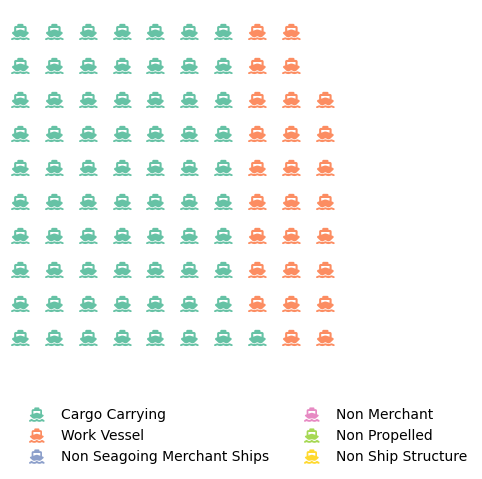

In [13]:
fig = fc.waffle_chart_zone(AIS_enriched, by = "ShiptypeLevel1")

In [181]:
df = fc.count_boats_blocked(
            AIS_enriched,
            share_not_usable=0.3,
            by="ShiptypeLevel1"
            )
df.index.nunique()

3

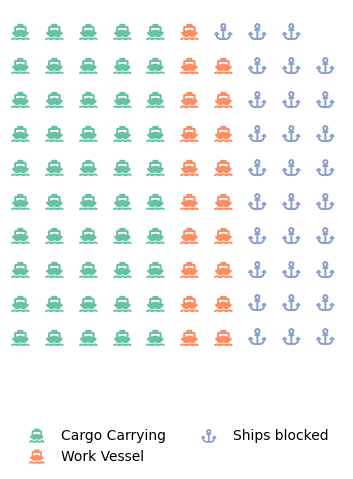

In [182]:
fc = reload(fc)
fig = fc.waffle_chart_zone(AIS_enriched, by = "ShiptypeLevel1", share_blocked=0.3)

In [8]:
import numpy as np
import geopandas as gpd
import folium

ports = fc.import_ports()

center, sw, ne = fc.bbox_geopandas(ports, "Latitude", "Longitude")

ports['map_color'] = np.where(ports["World Water Body"].str.contains("Black"), 'lightblue','red')
ports['text'] = ports["Main Port Name"]

In [105]:
m = folium.Map(location = center, tiles='Stamen Toner', zoom_start=6)

for i in range(0,len(ports)):
    folium.Marker(
        [ports.iloc[i]['Latitude'], ports.iloc[i]['Longitude']],
        popup=ports.iloc[i]['text'],
        icon=folium.Icon(color=ports.iloc[i]['map_color'], icon="ship")
        ).add_to(m)

In [15]:
#m

In [117]:
m = folium.Map(location = center, tiles='Stamen Toner', zoom_start=6)

temp = ports.loc[ports["Harbor Size"] == "Large"]

for i in range(0,len(temp)):
    folium.Marker(
        [temp.iloc[i]['Latitude'], temp.iloc[i]['Longitude']],
        popup=temp.iloc[i]['text'],
        icon=folium.Icon(color=temp.iloc[i]['map_color'], icon="ship")
        ).add_to(m)

In [119]:
#m

In [30]:
temp1 = fc.count_boats(AIS_enriched, by='ShiptypeLevel1').reset_index().assign(var='ShiptypeLevel1')
temp2 = fc.count_boats(AIS_enriched, by='ShipTypeLevel2').reset_index().assign(var='ShipTypeLevel2')
temp = pd.concat([temp1, temp2])

<AxesSubplot: >

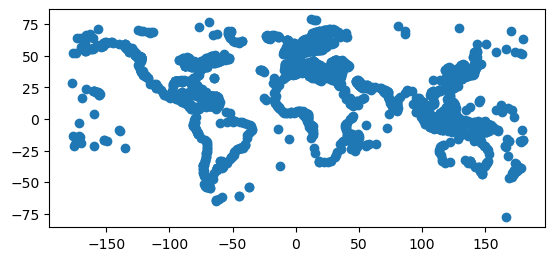

In [183]:
ports.plot()

In [94]:
temp = fc.count_boats(AIS_enriched, by='ShiptypeLevel1').reset_index().assign(var='ShiptypeLevel1')

In [126]:
fc.count_boats(AIS_enriched, by='ShiptypeLevel1')#.to_dict()

ShiptypeLevel1
Cargo Carrying                 1331
Work Vessel                     510
Non Seagoing Merchant Ships       9
Non Merchant                      7
Non Propelled                     4
Non Ship Structure                1
dtype: int64

In [61]:
fc = reload(fc)
ports2 = fc.subset_ports(ports, "Black")
ports2.head(1)

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Sailing Direction or Publication,Standard Nautical Chart,IHO S-57 Electronic Navigational Chart,IHO S-101 Electronic Navigational Chart,Digital Nautical Chart,Tidal Range (m),Entrance Width (m),Channel Depth (m),Anchorage Depth (m),Cargo Pier Depth (m),Oil Terminal Depth (m),Liquified Natural Gas Terminal Depth (m),Maximum Vessel Length (m),Maximum Vessel Beam (m),Maximum Vessel Draft (m),Offshore Maximum Vessel Length (m),Offshore Maximum Vessel Beam (m),Offshore Maximum Vessel Draft (m),Harbor Size,Harbor Type,Harbor Use,Shelter Afforded,Entrance Restriction - Tide,Entrance Restriction - Heavy Swell,Entrance Restriction - Ice,Entrance Restriction - Other,Overhead Limits,Underkeel Clearance Management System,Good Holding Ground,Turning Area,Port Security,Estimated Time of Arrival Message,Quarantine - Pratique,Quarantine - Sanitation,Quarantine - Other,Traffic Separation Scheme,Vessel Traffic Service,First Port of Entry,US Representative,Pilotage - Compulsory,Pilotage - Available,Pilotage - Local Assistance,Pilotage - Advisable,Tugs - Salvage,Tugs - Assistance,Communications - Telephone,Communications - Telefax,Communications - Radio,Communications - Radiotelephone,Communications - Airport,Communications - Rail,Search and Rescue,NAVAREA,Facilities - Wharves,Facilities - Anchorage,Facilities - Dangerous Cargo Anchorage,Facilities - Med Mooring,Facilities - Beach Mooring,Facilities - Ice Mooring,Facilities - Ro-Ro,Facilities - Solid Bulk,Facilities - Liquid Bulk,Facilities - Container,Facilities - Breakbulk,Facilities - Oil Terminal,Facilities - LNG Terminal,Facilities - Other,Medical Facilities,Garbage Disposal,Chemical Holding Tank Disposal,Degaussing,Dirty Ballast Disposal,Cranes - Fixed,Cranes - Mobile,Cranes - Floating,Cranes - Container,Lifts - 100+ Tons,Lifts - 50-100 Tons,Lifts - 25-49 Tons,Lifts - 0-24 Tons,Services - Longshoremen,Services - Electricity,Services - Steam,Services - Navigation Equipment,Services - Electrical Repair,Services - Ice Breaking,Services - Diving,Supplies - Provisions,Supplies - Potable Water,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude,geometry,map_color,text,size,region
19,11048,Dominican Republic -- 10950,Punta Nizao Oil Terminal,,,Dominican Republic,Caribbean Sea; North Atlantic Ocean,,Sailing Directions Pub. 147 (Enroute) - Caribbean Sea - Volume I,25842,,,"a1611070, coa16k, gen16",1.0,0.0,0.0,12.5,0.0,12.5,0.0,0.0,0.0,0.0,0.0,0,0.0,Small,Open Roadstead,Unknown,Fair,No,No,No,No,No,Unknown,Unknown,Yes,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,No,No,Yes,Yes,Unknown,Unknown,No,No,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,IV,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No,No,No,No,Unknown,Unknown,Unknown,None,Unknown,Unknown,18.2,-70.2,POINT (-70.20000 18.20000),red,Punta Nizao Oil Terminal,2.0,False


In [66]:
def plot_worldmap_ports(ports, region = "Black"):
    ports2 = fc.subset_ports(ports, region)
    ports2_region = ports2.loc[ports2['region']]
    worldmap = px.scatter_mapbox(ports2,
                        lon=ports2.geometry.x, lat=ports2.geometry.y,
                        size="size", # which column to use to set the color of markers
                        color="region",
                        opacity = 0.6,
                        #marker_symbol = 'harbor',
                        mapbox_style = "stamen-toner",
                        center=dict(lat=ports2_region.geometry.y.mean(), lon=ports2_region.geometry.x.mean()),
                        zoom = 4,
                        hover_name="Main Port Name" # column added to hover information
    )
    return worldmap

In [82]:
fc.count_boats(AIS_enriched, unique_id = "mmsi")

mmsi    1177
dtype: int64

In [80]:
plot_worldmap_ports(ports, "Gulf of Panama")

In [46]:
fc = reload(fc)
ports2 = fc.subset_ports(ports, "Suez")

In [45]:
ports.loc[ports["World Water Body"].str.contains("Suez")]

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Sailing Direction or Publication,Standard Nautical Chart,IHO S-57 Electronic Navigational Chart,IHO S-101 Electronic Navigational Chart,Digital Nautical Chart,Tidal Range (m),Entrance Width (m),Channel Depth (m),Anchorage Depth (m),Cargo Pier Depth (m),Oil Terminal Depth (m),Liquified Natural Gas Terminal Depth (m),Maximum Vessel Length (m),Maximum Vessel Beam (m),Maximum Vessel Draft (m),Offshore Maximum Vessel Length (m),Offshore Maximum Vessel Beam (m),Offshore Maximum Vessel Draft (m),Harbor Size,Harbor Type,Harbor Use,Shelter Afforded,Entrance Restriction - Tide,Entrance Restriction - Heavy Swell,Entrance Restriction - Ice,Entrance Restriction - Other,Overhead Limits,Underkeel Clearance Management System,Good Holding Ground,Turning Area,Port Security,Estimated Time of Arrival Message,Quarantine - Pratique,Quarantine - Sanitation,Quarantine - Other,Traffic Separation Scheme,Vessel Traffic Service,First Port of Entry,US Representative,Pilotage - Compulsory,Pilotage - Available,Pilotage - Local Assistance,Pilotage - Advisable,Tugs - Salvage,Tugs - Assistance,Communications - Telephone,Communications - Telefax,Communications - Radio,Communications - Radiotelephone,Communications - Airport,Communications - Rail,Search and Rescue,NAVAREA,Facilities - Wharves,Facilities - Anchorage,Facilities - Dangerous Cargo Anchorage,Facilities - Med Mooring,Facilities - Beach Mooring,Facilities - Ice Mooring,Facilities - Ro-Ro,Facilities - Solid Bulk,Facilities - Liquid Bulk,Facilities - Container,Facilities - Breakbulk,Facilities - Oil Terminal,Facilities - LNG Terminal,Facilities - Other,Medical Facilities,Garbage Disposal,Chemical Holding Tank Disposal,Degaussing,Dirty Ballast Disposal,Cranes - Fixed,Cranes - Mobile,Cranes - Floating,Cranes - Container,Lifts - 100+ Tons,Lifts - 50-100 Tons,Lifts - 25-49 Tons,Lifts - 0-24 Tons,Services - Longshoremen,Services - Electricity,Services - Steam,Services - Navigation Equipment,Services - Electrical Repair,Services - Ice Breaking,Services - Diving,Supplies - Provisions,Supplies - Potable Water,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude,geometry,map_color,text,size
60,47989,Egypt Red Sea -- 47950,Zeit Bay Lpg Terminal,,,Egypt,Gulf of Suez; Red Sea; Indian Ocean,,Sailing Directions Pub. 172 (Enroute) - Red Sea and the Persian Gulf,62191,,,"a1048015, coa10f, gen10c",1.0,0.0,3.4,20.1,0.0,7.9,0.0,0.0,0.0,0.0,0.0,0,0.0,Very Small,Open Roadstead,Unknown,Poor,Yes,Yes,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,IX,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Yes,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No,No,No,No,Unknown,Unknown,Unknown,None,Unknown,Unknown,27.800000,33.566667,POINT (33.56667 27.80000),red,Zeit Bay Lpg Terminal,1.0
104,47987,Egypt Red Sea -- 47950,East Zeit Terminal,,,Egypt,Gulf of Suez; Red Sea; Indian Ocean,,Sailing Directions Pub. 172 (Enroute) - Red Sea and the Persian Gulf,62191,,,"a1048015, coa10f, gen10c",1.0,0.0,3.4,20.1,0.0,23.2,0.0,0.0,0.0,0.0,0.0,0,0.0,Very Small,Open Roadstead,Unknown,Poor,Yes,Yes,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,IX,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unk

In [47]:
import plotly.express as px

fig = px.scatter_mapbox(ports2,
                    lon=ports2.geometry.x, lat=ports2.geometry.y,
                    size="size", # which column to use to set the color of markers
                    color="map_color",
                    opacity = 0.6,
                    #marker_symbol = 'star',
                    mapbox_style = "stamen-toner",
                    center=dict(lat=43.2, lon=33.5),
                    zoom = 4,
                    hover_name="Main Port Name", # column added to hover information
)
                    #projection="orthographic")



fig.show()